# Gredient Descent

### Task : To find a line of best fit that predicts relationship between two variables

### Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Dataset

The CS: GO dataset has been chosen<br>
From file 'ADRvsRating.csv' has been chosen with variables:
 - **ADR** : Average damage per round
 - **Rating** : HLTV Rating 2.0    

In [11]:
dataset = pd.read_csv('ADRvsRating.csv')
data = dataset.iloc[:,:].values
numInstances = data.shape[0]

dataset.head()

,ADR,Rating
0,85.0,117.0
1,83.5,110.0
2,78.2,102.0
3,68.1,97.0
4,66.3,86.0


#### Data visualization

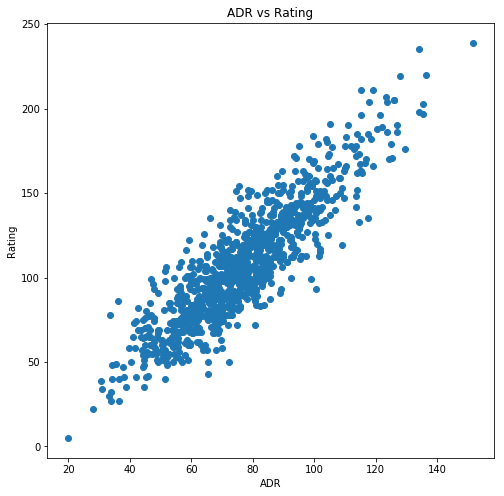

In [16]:
plt.figure(figsize=(8,8))
plt.title('ADR vs Rating')
plt.scatter(x=dataset.iloc[:,0].values,y=dataset.iloc[:,1].values)
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

## Square of Squared errors

In [28]:
def SSE(m,b,data):
    total_error = 0.0
    for i in range(numInstances):
        adr = data[i,0]
        rating = data[i,1]
        # calculated value
        current_output = m*adr + b
        
        # output 
        current_target = rating
        
        # find the squared error
        current_SE = (current_target - current_output)**2
        
        # add it to total error
        total_error = total_error + current_SE
    sse = total_error /numInstances
    return sse

The strategy: 
1. Create a initial line
2. Update the line parameters in a way that makes the error SMALLER

The 2nd point implies that we need **a direction**, a **way to descend the error valley**

The way to go: Compute the **partial derivatives** respect to 'm' and 'b'. Get the direction that **decreases** the gradient (towards zero error) and **update 'm' and 'b' accordingly**

What we need to compute the Gradient Descent:
1. The current 'm' and 'b' to know which is our current fitting line
2. The real data, that corresponds to 'target' on the equation of the image

What will do:
1. Partial derivatives respect to 'm' and 'b'

What we will return:
1. The new 'better' updated 'm' and 'b'

In [29]:
def gradient_descent(m,b,data):
    N = numInstances
    m_grad = 0
    b_grad = 0
    for i in range(N):
        x = data[i,0]
        y = data[i,1]
        
        dm = -((2/N) * x * (y - (m*x + b)))
        db = - ((2/N) * (y - (m*x + b)))
        
        m_grad += dm
        b_grad += db
        
        m_update = m - (0.0001*m_grad)
        b_update = b - (0.0001*b_grad)
    return m_update,b_update


In [30]:
def gradient_descent_n_steps(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    print('Starting line: y = %.6fx + %.6f - Error: %.6f\n' %(m_starting,b_starting,SSE(m_starting,b_starting,data)))
    m = m_starting
    b = b_starting
    display_freq = steps//10
    for i in range(steps):
        m,b = gradient_descent(m,b,data)
        if(i % display_freq == 0):
            sse = SSE(m,b,data)
            print('At step %d - Line: y = %.6fx + %.6f - Error: %.6f' %(i+1,m,b,sse))
    
    
    print('\nBest  line: y = %.6fx + %.6f - Error: %.6f' %(m,b,sse))
    return m,b

In [33]:
m_start = 0
b_start = 0
steps = 5000

In [34]:
m_best,b_best = gradient_descent_n_steps(m_start,b_start ,data,steps)

Starting line: y = 0.000000x + 0.000000 - Error: 12515.672000

At step 1 - Line: y = 1.731325x + 0.021283 - Error: 882.127484
At step 501 - Line: y = 1.415741x + -0.074642 - Error: 267.990135
At step 1001 - Line: y = 1.416875x + -0.166095 - Error: 267.822834
At step 1501 - Line: y = 1.418002x + -0.257009 - Error: 267.657505
At step 2001 - Line: y = 1.419123x + -0.347384 - Error: 267.494124
At step 2501 - Line: y = 1.420237x + -0.437226 - Error: 267.332669
At step 3001 - Line: y = 1.421344x + -0.526537 - Error: 267.173117
At step 3501 - Line: y = 1.422445x + -0.615320 - Error: 267.015445
At step 4001 - Line: y = 1.423540x + -0.703578 - Error: 266.859632
At step 4501 - Line: y = 1.424628x + -0.791314 - Error: 266.705655

Best  line: y = 1.425707x + -0.878358 - Error: 266.705655


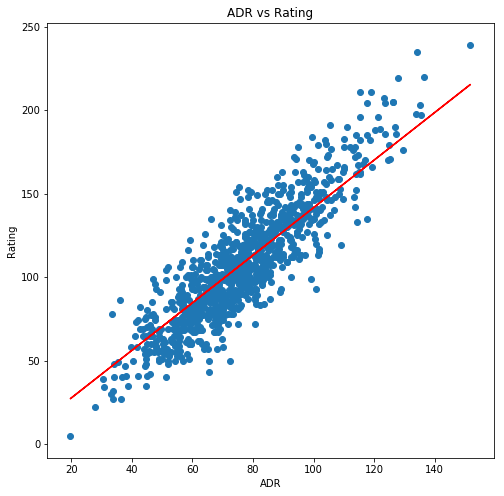

In [45]:
plt.figure(figsize=(8,8))
plt.title('ADR vs Rating')
plt.plot(dataset.iloc[:,0].values,1.424628*dataset.iloc[:,0].values - 0.878358,color='red')
plt.scatter(x=dataset.iloc[:,0].values,y=dataset.iloc[:,1].values)
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()